In [1]:
import numpy as np
import pandas as pd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 1 + 1) instead
  


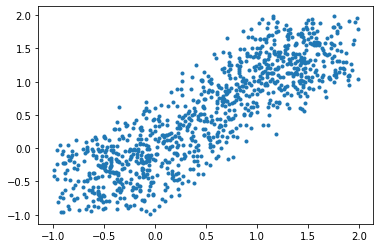

In [6]:
# Let there be 1000 data points with 50 sinusoidal features
features=50


for i in range(features):
  w=np.random.random_integers(1)*3.14
  t=np.sin(w*np.arange(1000)) +np.random.random(size=1000)
  if i==0:
    xx=t.reshape(-1,1)
  else:
    xx=np.concatenate([xx,t.reshape(-1,1)],axis=1)

xx.shape


import matplotlib.pyplot as plt

plt.plot(xx[:,0],xx[:,1],'.')

In [29]:
class PCA_scratch():
  def __init__(self,n_components,explainability=None):
    self.n_components=n_components
    self.explainability=explainability
    self.projection=[None]

  def fit(self,x):
    x=x-np.mean(x,axis=0)#Centring
    x_scaled=x/np.var(x,axis=0)#Scaling

    x_corr=np.corrcoef(np.transpose(x_scaled))

    eig_val,eig_vec=np.linalg.eig(x_corr)

    if self.explainability:
      e_ratio=0
      eig_val=np.sort(eig_val)

      for i,e in enumerate(eig_val):
        e_ratio+=i
        if e_ratio>=self.explainability:
          self.n_components=e
          break
    self.projection=eig_vec[:,:self.n_components] 
    #We will save projection of features(x.shape[1]) for top n basis/eigenvector
    #Each Column of the eig_vec is the eigenvector

      
    #These projections will help in transforming test or train data across the new basis diemnsion
    return
      
  def transform(self,x):
    if not any(self.projection[0]):
      self.fit(x)
    
    assert(x.shape[1]==self.projection.shape[0])

    return x@self.projection










  


In [31]:
x_train=xx[:800,:]
x_test=xx[800:,:]

print(f'x has got {xx.shape[1]} features and there are {xx.shape[0]} instances of x type')
pca=PCA_scratch(n_components=5)
pca.fit(x_train)

x_transformed=pca.transform(x_test)

# pca.projection.shape

x has got 50 features and there are 1000 instances of x type


# Rough Work

In [11]:
temp=xx[:,:5]
corr=np.corrcoef(np.transpose(temp))
print(corr.shape)

np.linalg.eig(corr)#Each column is a eigenvector



(5, 5)


(array([4.43700851, 0.15067646, 0.13234036, 0.13860583, 0.14136884]),
 array([[-0.44659901,  0.60203873,  0.32087074,  0.45858269,  0.35333069],
        [-0.44759651, -0.23488203, -0.42406006,  0.55743247, -0.50391458],
        [-0.44733887,  0.44948406, -0.44627952, -0.61953056, -0.12193642],
        [-0.44638312, -0.5617675 , -0.15436614, -0.10610387,  0.67087439],
        [-0.44814812, -0.25448213,  0.70300833, -0.28964602, -0.39533097]]))

In [26]:
any([None])

TypeError: ignored